In [1]:
import os
os.chdir("/Users/patrick/Documents/skole/current_courses/VeriNet")

import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib.pyplot as plt

from src.algorithm.verinet import VeriNet
from src.data_loader.input_data_loader import load_neurify_mnist
from src.data_loader.nnet import NNET
from src.algorithm.verification_objectives import ArbitraryAdversarialObjective
from src.algorithm.verinet_util import Status

%load_ext autoreload
%autoreload 2

### Cifar 10 samples

(-0.5, 27.5, 27.5, -0.5)

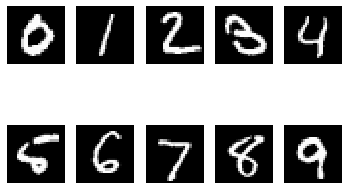

In [21]:
num_images = 100
images = load_neurify_mnist("./data/mnist_neurify", range(num_images)).reshape(num_images, -1)

plt.subplot(2,5,1)
plt.imshow(images[3].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,2)
plt.imshow(images[2].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,3)
plt.imshow(images[1].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,4)
plt.imshow(images[18].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,5)
plt.imshow(images[4].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,6)
plt.imshow(images[8].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,7)
plt.imshow(images[-2].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,8)
plt.imshow(images[0].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,9)
plt.imshow(images[-16].reshape(28,28), cmap="gray")
plt.axis("off")
plt.subplot(2,5,10)
plt.imshow(images[-1].reshape(28,28), cmap="gray")
plt.axis("off")

### Plot Relu linear relaxation

Text(0, 0.5, 'y')

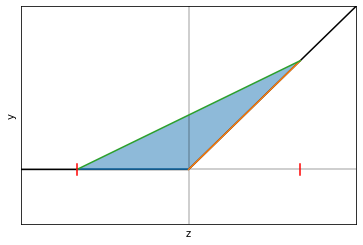

In [22]:
x = np.linspace(-2, 2, 1000)
x_to_zero = np.linspace(-2, 0, 1000)
x_zero_up = np.linspace(0, 2, 1000)
x_long = np.linspace(-4, 4, 1000)

relu = x_long.copy()
relu[relu < 0] = 0

relax_low_1 = np.zeros_like(x_to_zero)
relax_low_2 = x_zero_up
relax_up = 0.5 * x + 1

v_line = np.linspace(-0.1, 0.1, 10)
plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.xticks([])
plt.yticks([])
plt.plot(x_long, relu, "black", x_to_zero, relax_low_1, x_zero_up, relax_low_2, x, relax, np.zeros_like(v_line) - 2, v_line, "red", np.zeros_like(v_line) + 2, v_line, "red")

plt.axis((-3, 3, -1, 3))
plt.fill_between(x, np.concatenate((relax_low_1, relax_low_2))[::2], relax_up, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

### Neurify Relu linear relaxation

Text(0, 0.5, 'y')

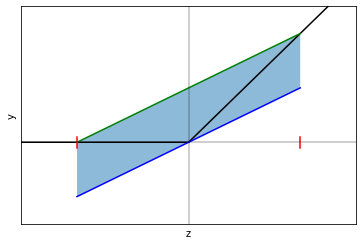

In [25]:
x = np.linspace(-2, 2, 1000)
x_long = np.linspace(-4, 4, 1000)
relu = x_long.copy()
relu[relu < 0] = 0

relax_low = 0.5 * x 
relax_up = 0.5 * x + 1

v_line = np.linspace(-0.1, 0.1, 10)

plt.xticks([])
plt.yticks([])
v_line = np.linspace(-0.1, 0.1, 10)

plt.plot(x_long, relu, "k", x, relax_low, "b", x, relax_up, "g", np.zeros_like(v_line) - 2, v_line, "r", np.zeros_like(v_line) + 2, v_line, "r")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-3, 3, -1.5, 2.5))

plt.fill_between(x, 0.5*x, 0.5*x + 1, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

### Sigmoid naive linear relaxation

Text(0, 0.5, 'y')

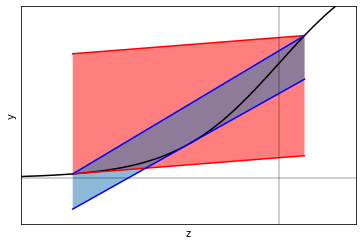

In [50]:
start, end = -4, 0.5
x_long = np.linspace(-6, 2, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

relax_low = min_d * x + (s[0] - min_d*start)
relax_up = min_d * x + (s[-1] - min_d*end)

v_line = np.linspace(-0.1, 0.1, 10)

relax_low_opt = d_tangent*x - d_tangent * tangent_point + sigmoid(tangent_point)
relax_up_opt = ((s[-1] - s[0])/(x[-1] - x[0]))*(x - x[-1]) + (s[-1])

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_low, "r", x, relax_up, "r", x, relax_low_opt, "b", x, relax_up_opt, "b")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 1.5, -0.2, 0.75))

plt.fill_between(x, relax_low, relax_up, alpha=0.5, facecolor="red")
plt.fill_between(x, relax_low_opt, relax_up_opt, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

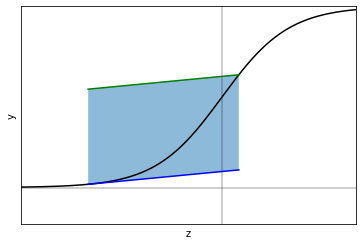

In [3]:
start, end = -4, 0.5
x_long = np.linspace(-6, 4, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

relax_low = min_d * x + (s[0] - min_d*start)
relax_up = min_d * x + (s[-1] - min_d*end)

tangent_point = (x[0]**2 - x[-1]**2)/(2*(x[0] - x[-1]))
d_tangent = d_sigmoid(tangent_point)

relax_low_opt = d_tangent*x - d_tangent * tangent_point + sigmoid(tangent_point)
relax_up_opt = ((s[-1] - s[0])/(x[-1] - x[0]))*(x - x[-1]) + (s[-1])

v_line = np.linspace(-0.1, 0.1, 10)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_low, "b", x, relax_up, "g")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-6, 4, -0.2, 1))

plt.fill_between(x, relax_low, relax_up, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

### Naive vs. symbolic interval propagation

/Users/patrick/.local/share/virtualenvs/src-mm8Q-jZ2/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x132e90a58> has a label of '_no_label_' which cannot be automatically added to the legend.
/Users/patrick/.local/share/virtualenvs/src-mm8Q-jZ2/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x133022e80> has a label of '_no_label' which cannot be automatically added to the legend.


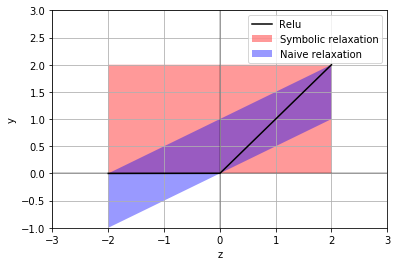

In [76]:
x = np.linspace(-2, 2, 1000)
relu = x.copy()
relu[relu < 0] = 0

v_line = np.linspace(-0.1, 0.1, 10)

plt.plot(x, relu, "k")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-3, 3, -1, 3))

plt.fill_between(x, np.zeros_like(x), np.zeros_like(x) + 2, facecolor="red", alpha=0.4)
plt.fill_between(x, 0.5*x, 0.5*x + 1, facecolor="blue", alpha=0.4)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")
plt.legend(["Relu", "_no_label_", "_no_label", "Symbolic relaxation", "Naive relaxation"])

### Adversarial example

8
6


(-0.5, 27.5, 27.5, -0.5)

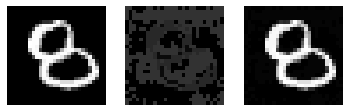

In [49]:
nnet = NNET("./data/models_nnet/neurify/mnist24.nnet")
model = nnet.from_nnet_to_verinet_nn()

solver = VeriNet(model, max_procs=20)

image = load_neurify_mnist("./data/mnist_neurify/test_images_100/", list(range(100))).reshape((100, -1))[2]
correct_class = int(model(torch.Tensor(image)).argmax(dim=1))

eps = 5
input_bounds = np.zeros((*image.shape, 2), dtype=np.float32)
input_bounds[:, 0] = image - eps
input_bounds[:, 1] = image + eps
input_bounds = nnet.normalize_input(input_bounds)

objective = ArbitraryAdversarialObjective(correct_class, input_bounds, output_size=10)
solver.verify(objective, timeout=3600, no_split=False, verbose=False)

counter_example = np.array(solver.counter_example)
diff = (abs(counter_example - nnet.normalize_input(image)) * 255).astype(np.int32) * 10

print(correct_class)
print(int(model(torch.Tensor(counter_example)).argmax(dim=1)))

plt.subplot(1,3,1)
plt.imshow(image.reshape((28,28)), cmap="gray")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(diff.reshape((28, 28)), cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(counter_example.reshape(28, 28), cmap="gray")
plt.axis('off')
#print(counter_example)

Text(0, 0.5, 'y')

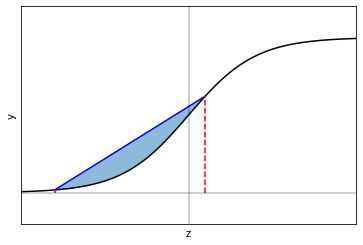

In [66]:
start, end = -4, 0.5
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])


relax_up_opt = ((s[-1] - s[0])/(x[-1] - x[0]))*(x - x[-1]) + (s[-1])

v_line_start = np.linspace(0, s[0], 100)
v_line_end = np.linspace(0, s[-1], 100)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_up_opt, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_end)+end, v_line_end, "r--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

plt.fill_between(x, s, relax_up_opt, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

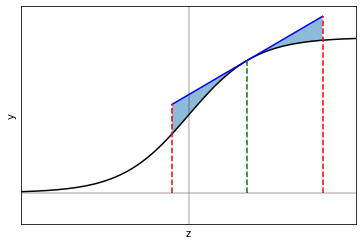

In [67]:
start, end = -0.5, 4
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

v_line = np.linspace(-0.1, 0.1, 10)

tangent_point = (x[-1]**2 - x[0]**2)/(2*(x[-1] - x[0]))

d_tangent = d_sigmoid(tangent_point)
relax_up_opt = d_tangent*x - d_tangent * tangent_point + sigmoid(tangent_point)

v_line_start = np.linspace(0, relax_up_opt[0], 100)
v_line_end = np.linspace(0, relax_up_opt[-1], 100)
v_line_tan = np.linspace(0, sigmoid(tangent_point), 100)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_up_opt, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_end)+end, v_line_end, "r--", np.zeros_like(v_line_tan)+tangent_point, v_line_tan, "g--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

plt.fill_between(x, s, relax_up_opt, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

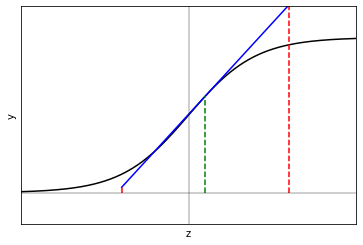

In [68]:
start, end = -2, 3
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

v_line = np.linspace(-0.1, 0.1, 10)

tangent_point = (x[-1]**2 - x[0]**2)/(2*(x[-1] - x[0]))

d_tangent = d_sigmoid(tangent_point)
relax_up_opt = d_tangent*x - d_tangent * tangent_point + sigmoid(tangent_point)

v_line_start = np.linspace(0, relax_up_opt[0], 100)
v_line_end = np.linspace(0, relax_up_opt[-1], 100)
v_line_tan = np.linspace(0, sigmoid(tangent_point), 100)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_up_opt, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_end)+end, v_line_end, "r--", np.zeros_like(v_line_tan)+tangent_point, v_line_tan, "g--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

#plt.fill_between(x, s, relax_up_opt, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

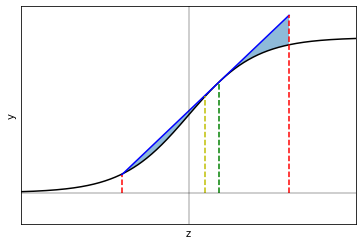

In [69]:
start, end = -2, 3
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

v_line = np.linspace(-0.1, 0.1, 10)

tangent_point = 0.9
tangent_point_opt = (x[-1]**2 - x[0]**2)/(2*(x[-1] - x[0]))

d_tangent = d_sigmoid(tangent_point)
relax_up_opt = d_tangent*x - d_tangent * tangent_point + sigmoid(tangent_point)

v_line_start = np.linspace(0, relax_up_opt[0], 100)
v_line_end = np.linspace(0, relax_up_opt[-1], 100)
v_line_tan = np.linspace(0, sigmoid(tangent_point), 100)
v_line_tan_opt = np.linspace(0, sigmoid(tangent_point_opt), 100)
plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, relax_up_opt, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_end)+end, v_line_end, "r--", np.zeros_like(v_line_tan)+tangent_point, v_line_tan, "g--",
        np.zeros_like(v_line_tan) + tangent_point_opt, v_line_tan_opt, "y--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

plt.fill_between(x, s, relax_up_opt, alpha=0.5)
plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

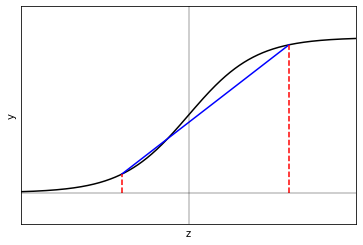

In [76]:
start, end = -2, 3
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

v_line = np.linspace(-0.1, 0.1, 10)

d_tangent = (s[-1] - s[0]) / (x[-1] - x[0])
intercept = d_tangent*x - d_tangent * x[0] + s[0]

v_line_start = np.linspace(0, s[0], 100)
v_line_end = np.linspace(0, s[-1], 100)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, intercept, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_end)+end, v_line_end, "r--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")

Text(0, 0.5, 'y')

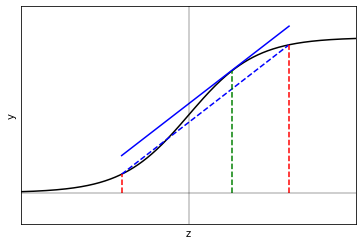

In [89]:
start, end = -2, 3
x_long = np.linspace(-6, 6, 1000)
x = np.linspace(start, end, 1000)
sigmoid = lambda x: 1/(1 + np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1 - sigmoid(x))

s = sigmoid(x)
min_d = d_sigmoid(x[0])

v_line = np.linspace(-0.1, 0.1, 10)

d_tangent = (s[-1] - s[0]) / (x[-1] - x[0])
intercept = d_tangent*x - d_tangent * x[0] + s[0]
tangent = intercept + 0.12
v_line_tan = np.linspace(0, sigmoid(1.3), 100)

v_line_start = np.linspace(0, s[0], 100)
v_line_end = np.linspace(0, s[-1], 100)

plt.xticks([])
plt.yticks([])

plt.plot(x_long, sigmoid(x_long), "k", x, intercept, "b--", x, tangent, "b", np.zeros_like(v_line_start)+start, v_line_start, "r--",
        np.zeros_like(v_line_tan)+1.3, v_line_tan, "g--", np.zeros_like(v_line_end)+end, v_line_end, "r--")

plt.axhline(y=0, color='k', alpha=0.25)
plt.axvline(x=0, color='k', alpha=0.25)
plt.axis((-5, 5, -0.2, 1.2))

plt.grid(True, which='both')
plt.xlabel("z")
plt.ylabel("y")